In [1]:
%matplotlib inline
import numpy as np
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.utils import np_utils
from keras import models
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
model = load_model('../Question-1/models/mnist_model_part1.h5')
# model.summary()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [3]:
# plt.imshow(x_test[0], cmap='viridis')

In [4]:
# plt.imshow(x_test[1], cmap='Greys')

In [5]:
# plt.imshow(x_test[2], cmap='Greys')

In [6]:
# plt.imshow(x_test[3], cmap='Greys')

In [7]:
# plt.imshow(x_test[4], cmap='Greys')

In [8]:
# plt.imshow(x_test[5], cmap='Greys')

In [9]:
# Post-processes the feature to make it visually palatable
def post_process(img):
    img = img - img.mean()
    img /= img.std() + K.epsilon()
    img *= 64
    img += 128
    img = np.clip(img, 0, 255).astype('uint8')
    return img

In [10]:
# top_layer = model.layers[0]

In [11]:
# plt.imshow(top_layer.get_weights()[0][:, :, :, 31].squeeze(), cmap='Greys')

In [12]:
layer_outputs = [layer.output for layer in model.layers[:12]]
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name)
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)    
layer_activations = activation_model.predict(x_test[7777].reshape(1, 28, 28, 1))
# # layer_activations[0] --> first layer Conv2D in this case
# layer_activation = layer_activations[0]
# layer_name = layer_names[0]
# plt.title(layer_name)
# plt.imshow(layer_activation[0, :, :, 0])

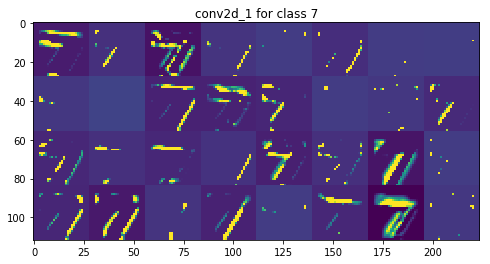

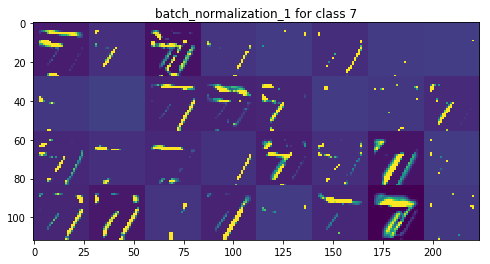

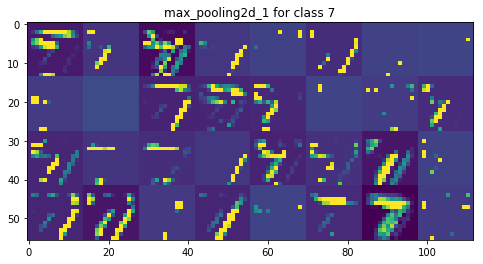

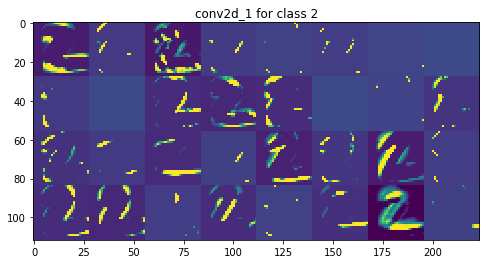

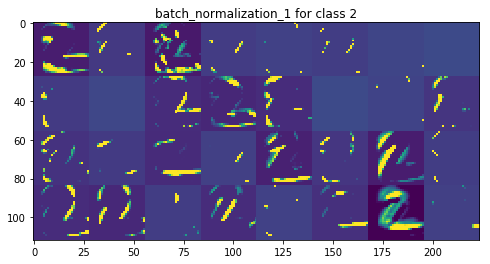

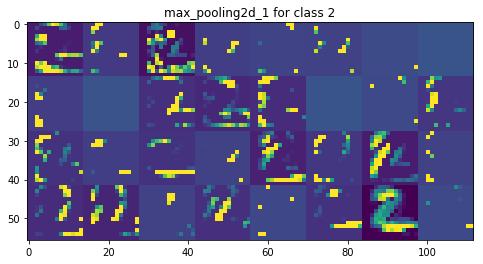

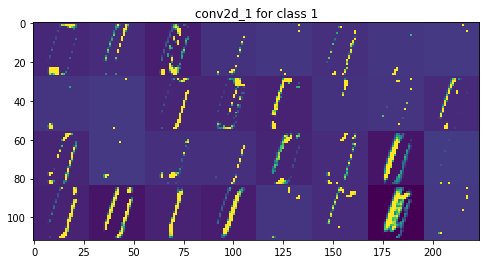

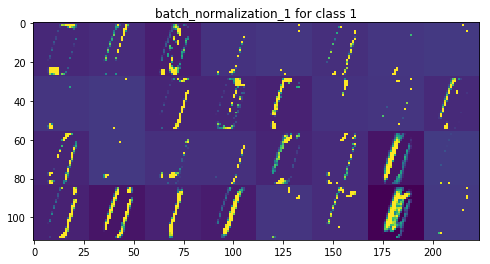

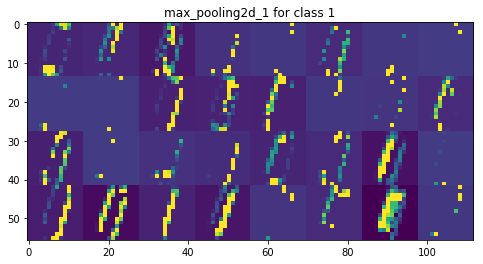

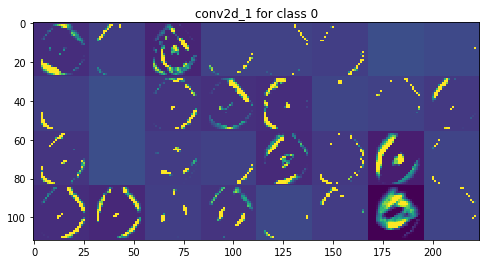

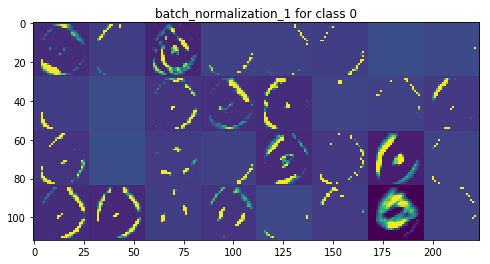

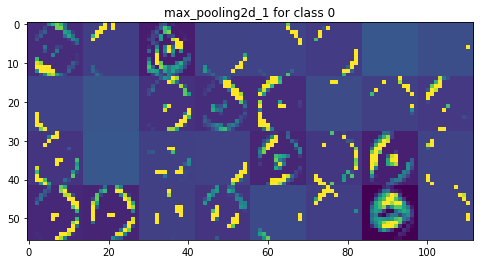

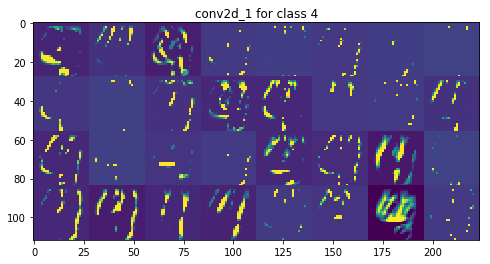

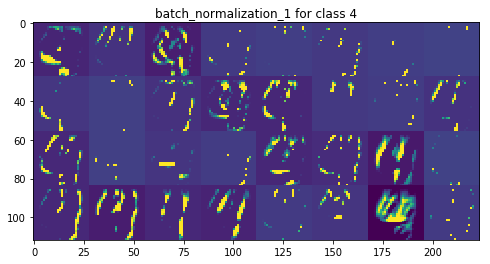

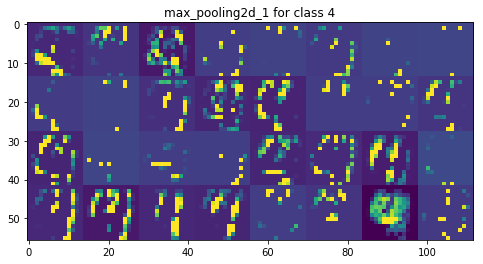

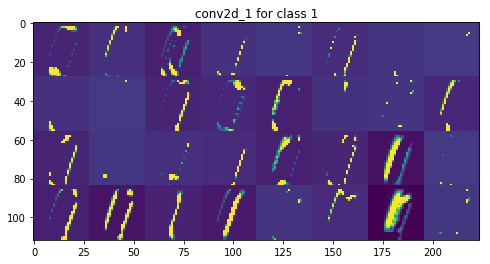

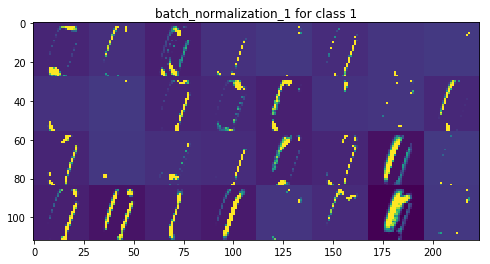

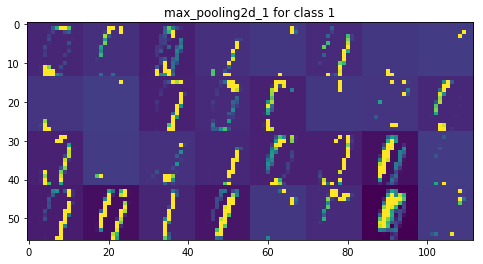

In [13]:
for i in range(6):
    layer_activations = activation_model.predict(x_test[i].reshape(1, 28, 28, 1))
    for j in range(3):
        layer_activation = layer_activations[j]
        images_per_row = 8    # number of images per row
        features = layer_activation.shape[-1]
        rows = features // images_per_row
        size = layer_activation.shape[1]
        display_features = np.zeros([rows*size, images_per_row*size], dtype='int')
        for row in range (rows):
            for col in range (images_per_row):
                img = layer_activation[0, :, :, row * images_per_row + col]
                img = post_process(img)
                display_features[ row*size : (row+1)*size, col * size : (col + 1) * size] = img
        scale = 1. / size
        plt.figure(figsize=(scale * display_features.shape[1],
                    scale * display_features.shape[0]))
        plt.title(layer_names[j] + ' for class ' + str(y_test[i]))
        plt.grid(False)
        plt.imshow(display_features,  aspect='auto', cmap='viridis')        

In [14]:
model = load_model('../Question-1/models/mnist_model_part2.h5')
# model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
layer_outputs = [layer.output for layer in model.layers[:12]]
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name)
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)    
layer_activations = activation_model.predict(x_test[7777].reshape(1, 28, 28, 1))
# # layer_activations[0] --> first layer Conv2D in this case
# layer_activation = layer_activations[0]
# layer_name = layer_names[0]
# plt.title(layer_name)
# plt.imshow(layer_activation[0, :, :, 0])

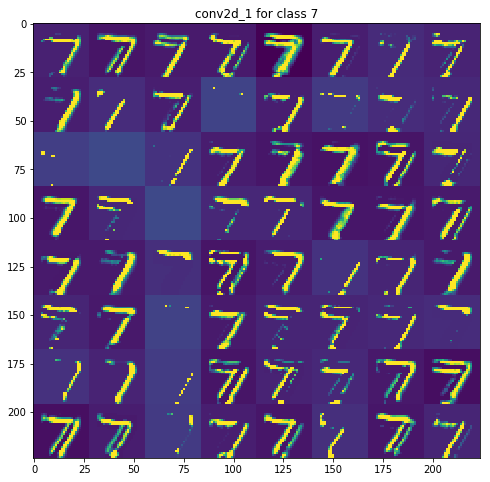

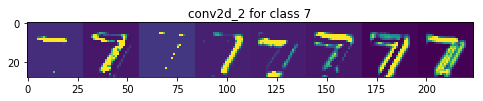

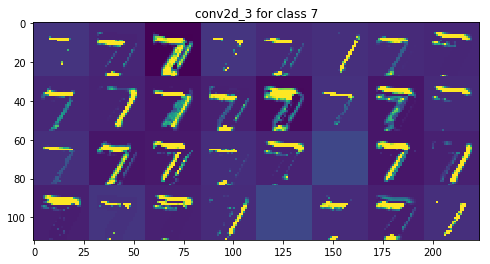

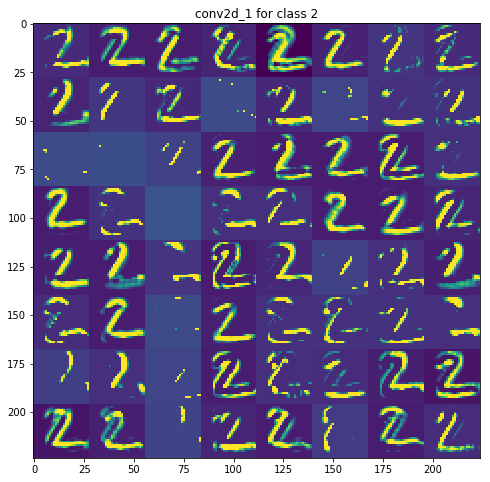

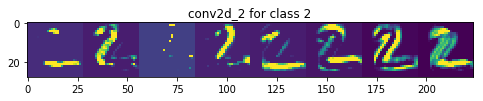

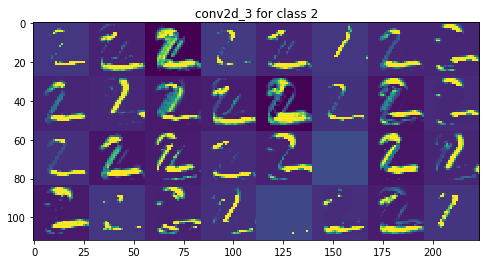

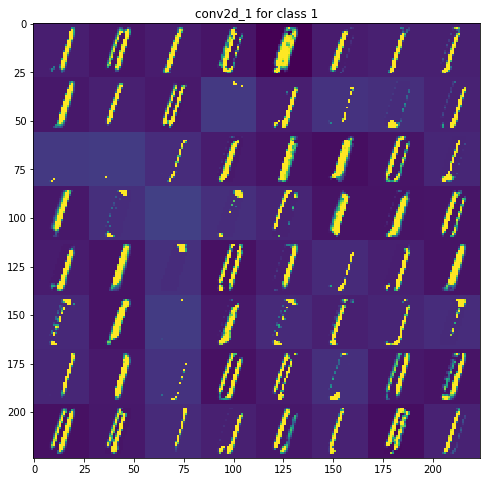

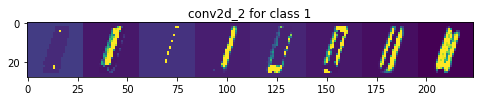

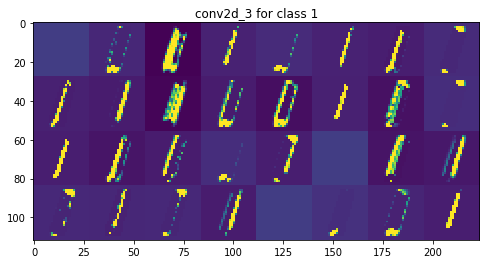

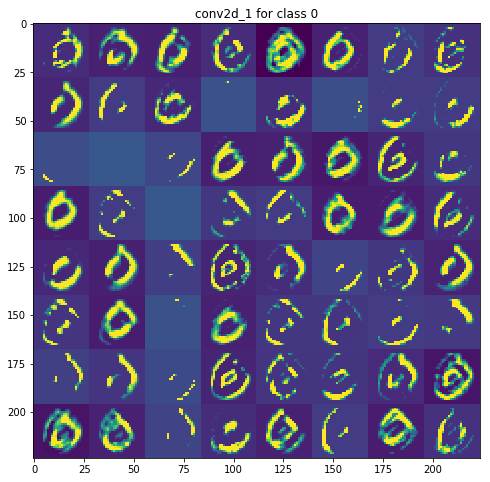

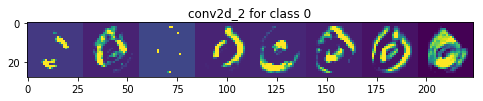

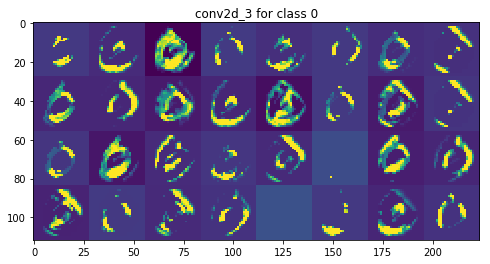

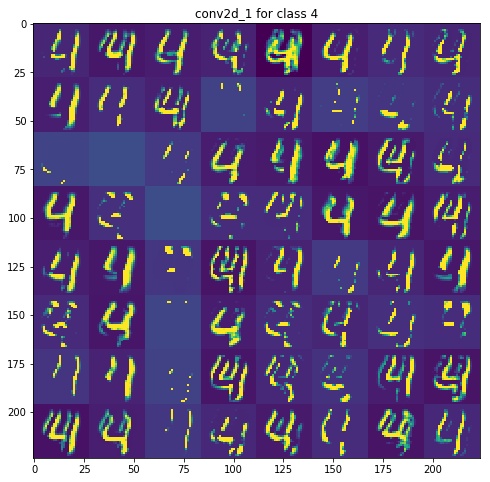

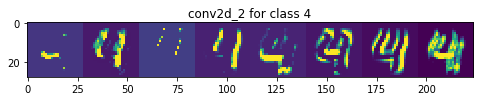

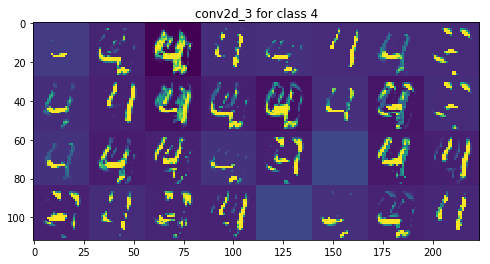

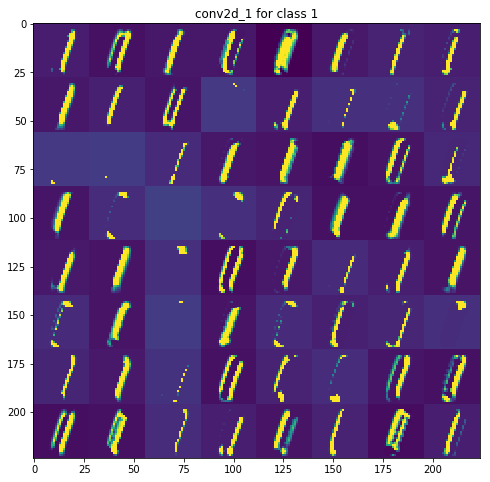

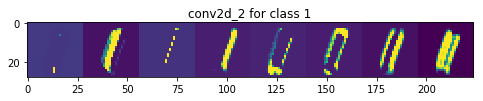

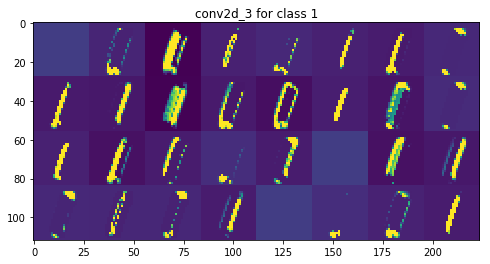

In [16]:
for i in range(6):
    layer_activations = activation_model.predict(x_test[i].reshape(1, 28, 28, 1))
    for j in range(3):
        layer_activation = layer_activations[j]
        images_per_row = 8    # number of images per row
        features = layer_activation.shape[-1]
        rows = features // images_per_row
        size = layer_activation.shape[1]
        display_features = np.zeros([rows*size, images_per_row*size], dtype='int')
        for row in range (rows):
            for col in range (images_per_row):
                img = layer_activation[0, :, :, row * images_per_row + col]
                img = post_process(img)
                display_features[ row*size : (row+1)*size, col * size : (col + 1) * size] = img
        scale = 1. / size
        plt.figure(figsize=(scale * display_features.shape[1],
                    scale * display_features.shape[0]))
        plt.title(layer_names[j] + ' for class ' + str(y_test[i]))
        plt.grid(False)
        plt.imshow(display_features,  aspect='auto', cmap='viridis')   

In [17]:
infile = open('../Question-1/line-data-input/X1.pickle','rb')
x_data = pickle.load(infile)
infile.close()

infile = open('../Question-1/line-data-input/Y1.pickle','rb')
y_data = pickle.load(infile)
infile.close()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)


In [19]:
# plt.imshow(x_test[0], cmap='Greys')

In [20]:
# plt.imshow(x_test[1], cmap='Greys')

In [21]:
# plt.imshow(x_test[2], cmap='Greys')

In [22]:
# plt.imshow(x_test[3], cmap='Greys')

In [23]:
# plt.imshow(x_test[4], cmap='Greys')

In [24]:
# plt.imshow(x_test[5], cmap='Greys')

In [25]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB values
x_train /= 255
x_test /= 255

In [26]:
model = load_model('../Question-1/models/line_model_part1.h5')
# model.summary()

In [27]:
layer_outputs = [layer.output for layer in model.layers[:12]]
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name)
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)    
layer_activations = activation_model.predict(x_test[7777].reshape(1, 28, 28, 3))
# # layer_activations[0] --> first layer Conv2D in this case
# layer_activation = layer_activations[0]
# layer_name = layer_names[0]
# plt.title(layer_name)
# plt.imshow(layer_activation[0, :, :, 0])

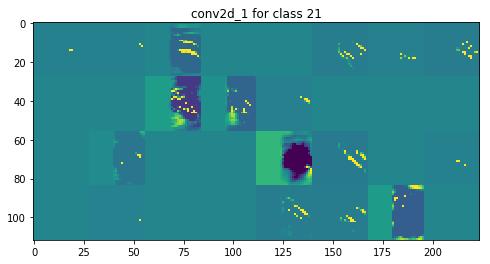

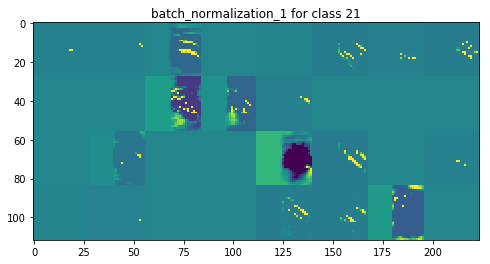

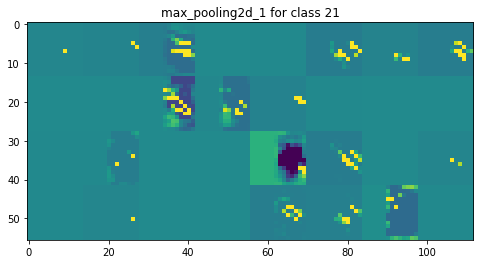

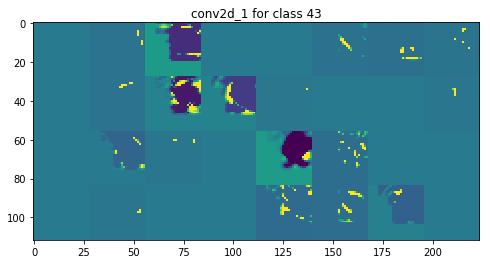

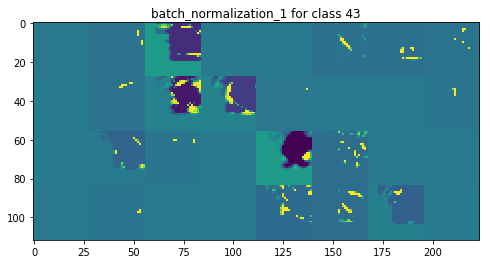

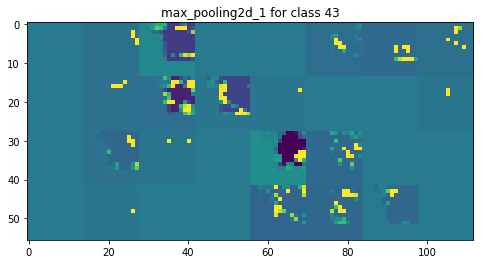

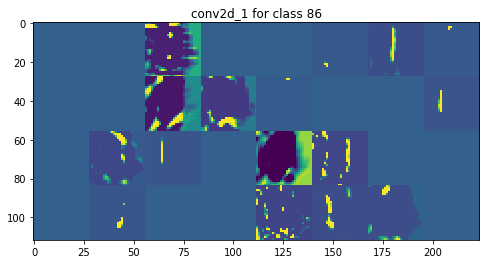

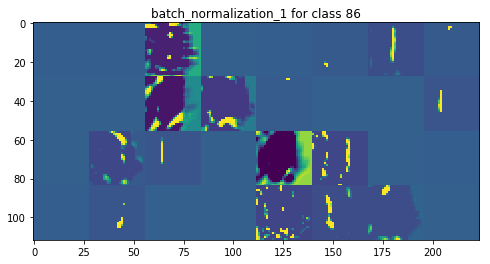

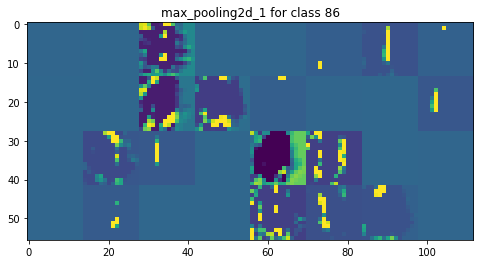

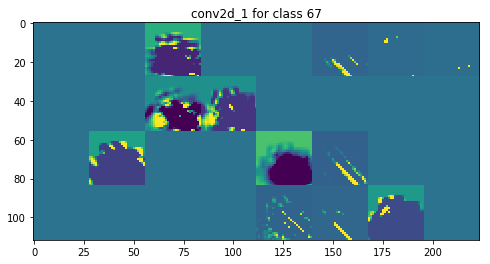

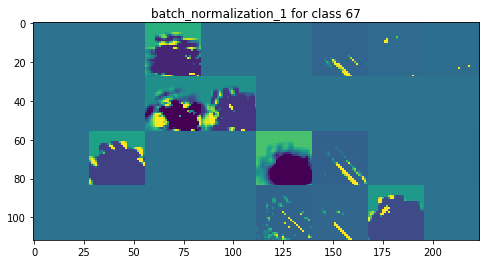

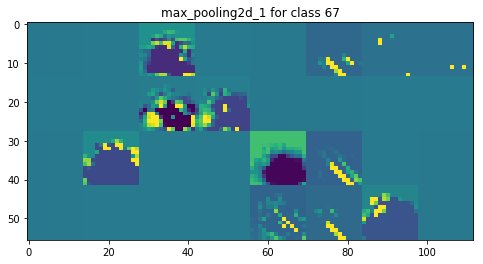

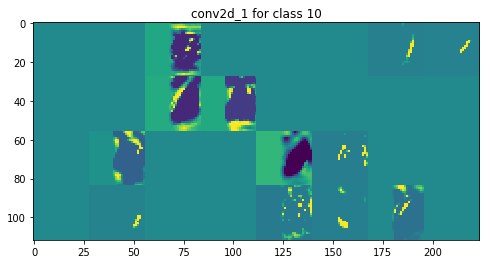

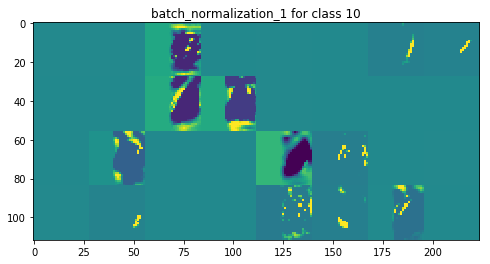

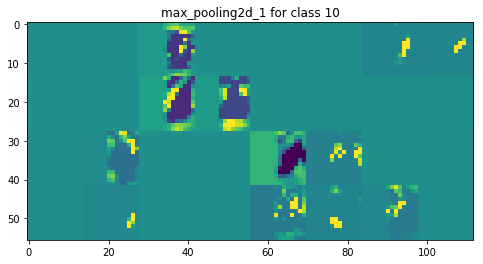

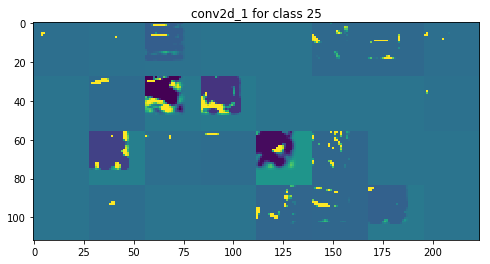

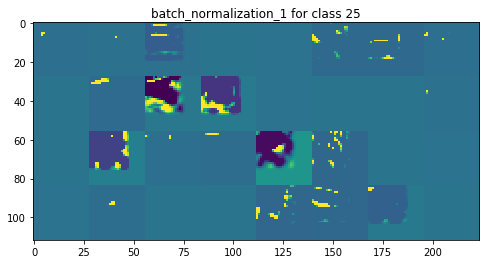

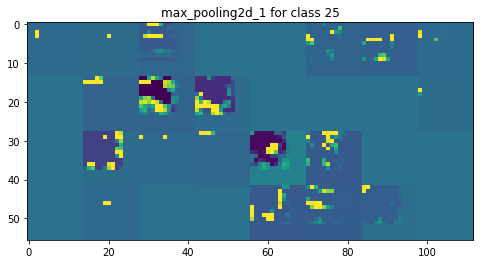

In [28]:
for i in range(6):
    layer_activations = activation_model.predict(x_test[i].reshape(1, 28, 28, 3))
    for j in range(3):
        layer_activation = layer_activations[j]
        images_per_row = 8    # number of images per row
        features = layer_activation.shape[-1]
        rows = features // images_per_row
        size = layer_activation.shape[1]
        display_features = np.zeros([rows*size, images_per_row*size], dtype='int')
        for row in range (rows):
            for col in range (images_per_row):
                img = layer_activation[0, :, :, row * images_per_row + col]
                img = post_process(img)
                display_features[ row*size : (row+1)*size, col * size : (col + 1) * size] = img
        scale = 1. / size
        plt.figure(figsize=(scale * display_features.shape[1],
                    scale * display_features.shape[0]))
        plt.title(layer_names[j] + ' for class ' + str(y_test[i]))
        plt.grid(False)
        plt.imshow(display_features,  aspect='auto', cmap='viridis')      

In [29]:
model = load_model('../Question-1/models/line_model_part2.h5')
# model.summary()

In [30]:
layer_outputs = [layer.output for layer in model.layers[:12]]
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name)
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)    
layer_activations = activation_model.predict(x_test[7777].reshape(1, 28, 28, 3))
# # layer_activations[0] --> first layer Conv2D in this case
# layer_activation = layer_activations[0]
# layer_name = layer_names[0]
# plt.title(layer_name)
# plt.imshow(layer_activation[0, :, :, 0])

/home/rajan/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


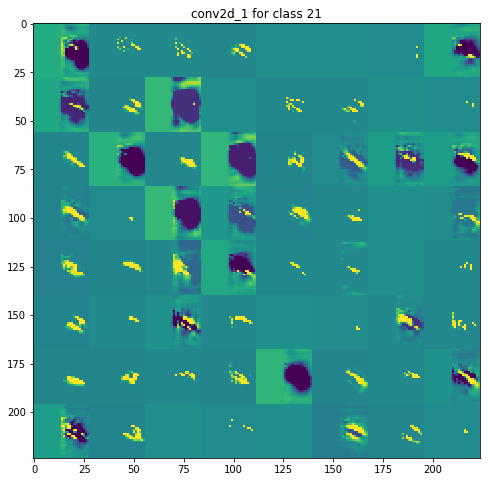

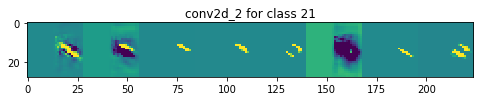

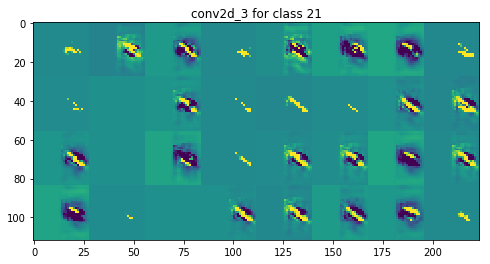

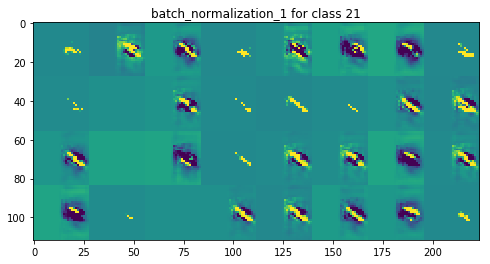

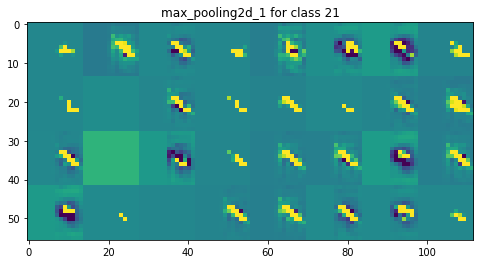

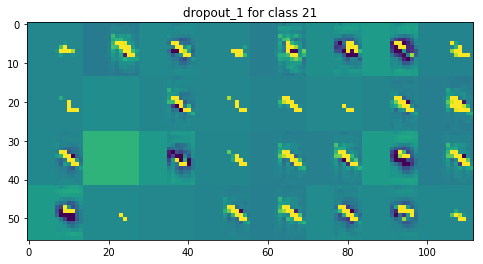

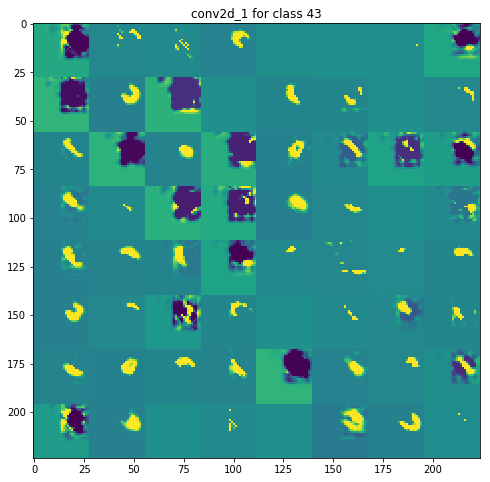

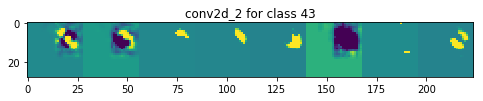

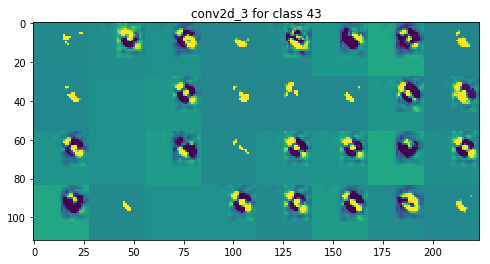

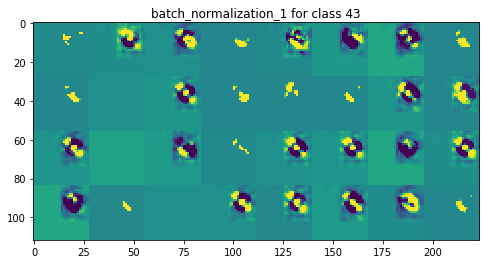

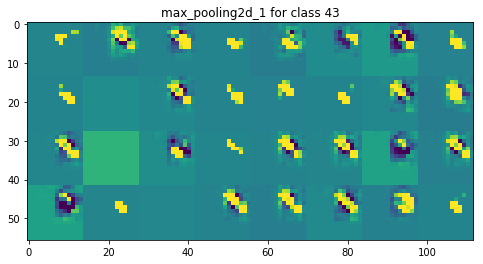

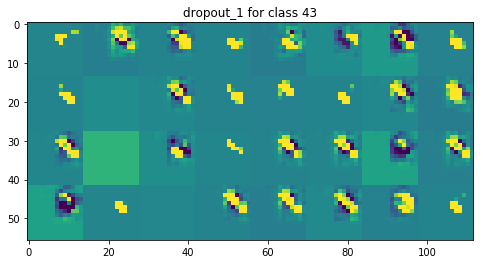

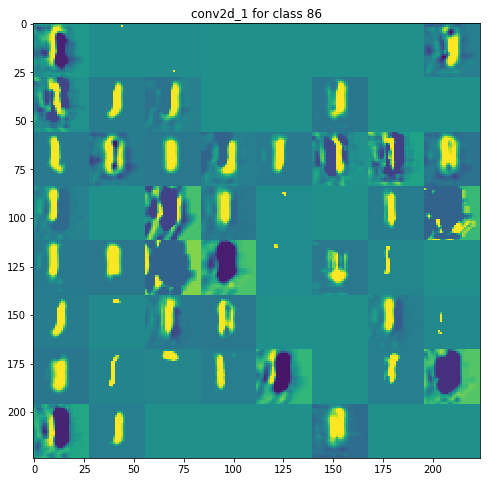

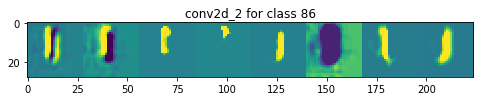

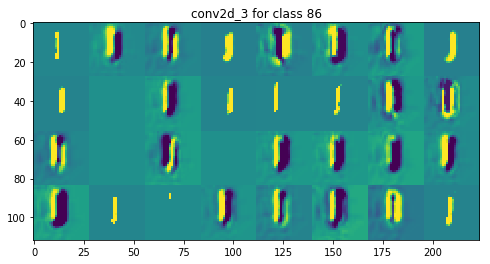

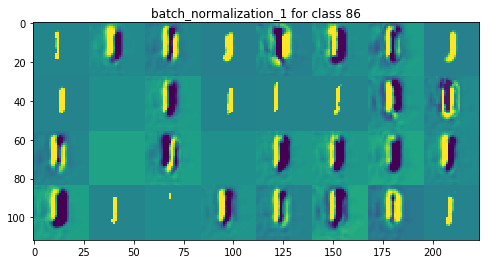

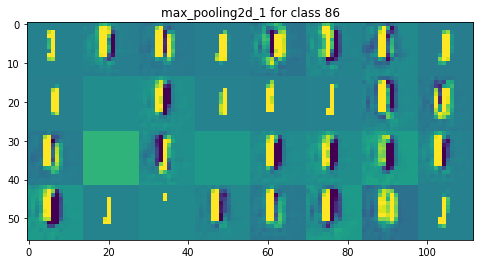

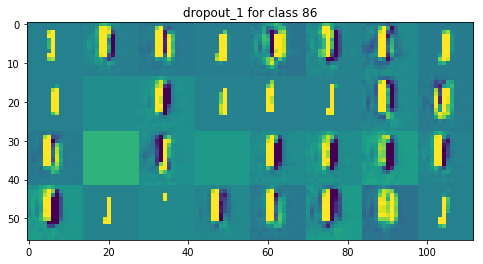

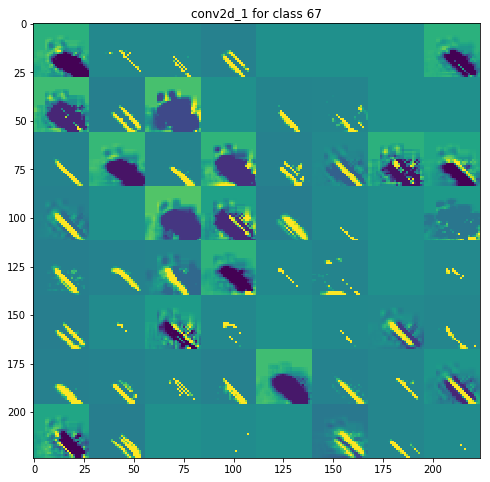

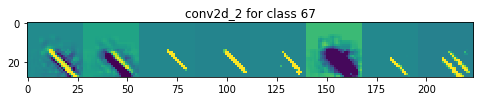

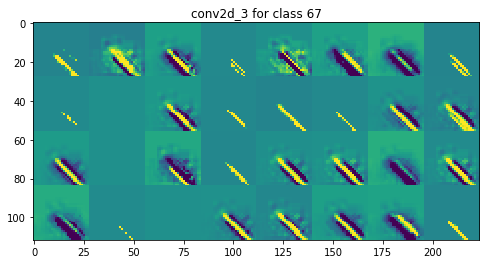

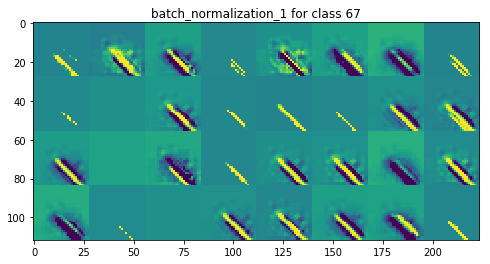

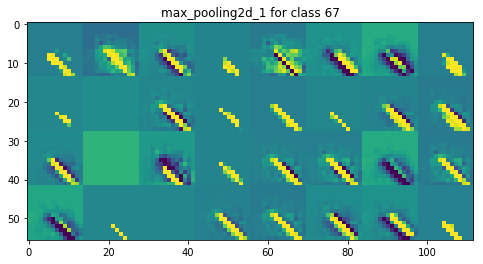

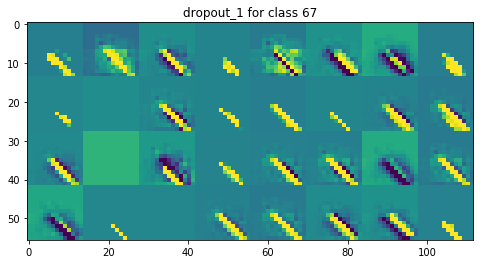

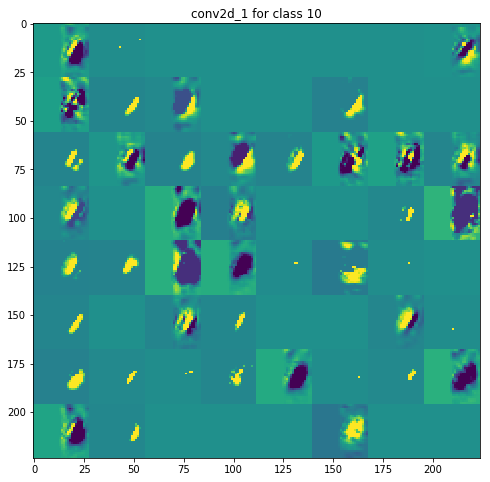

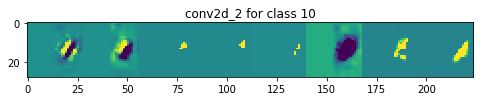

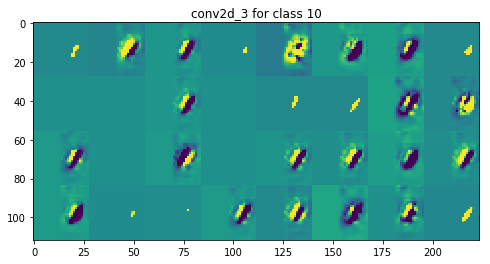

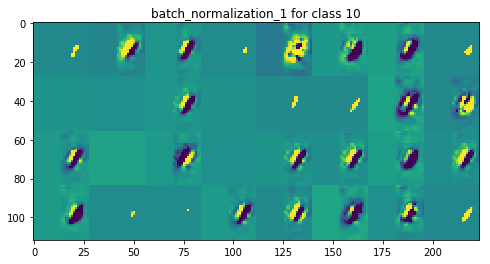

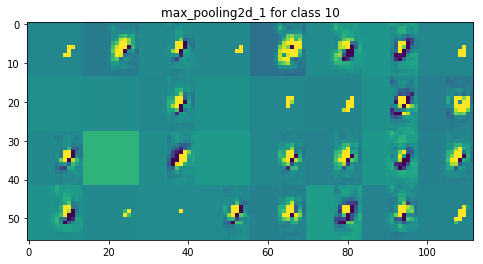

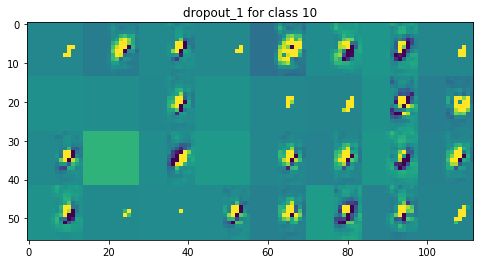

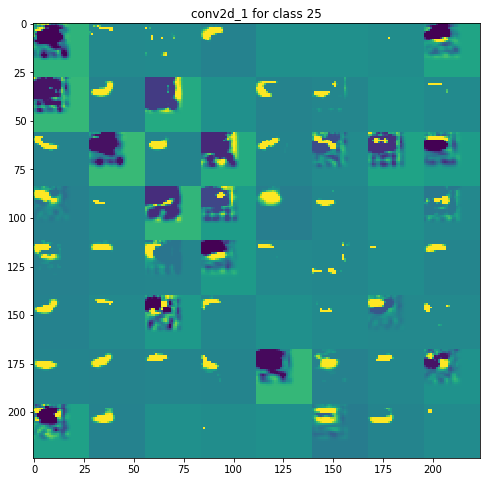

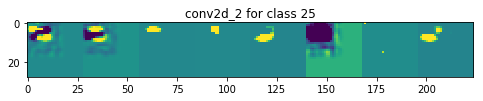

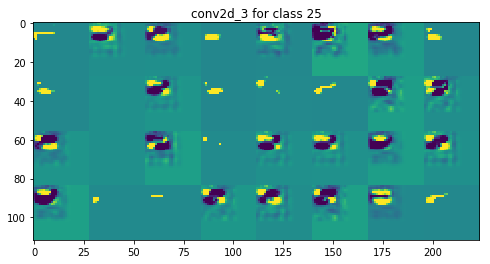

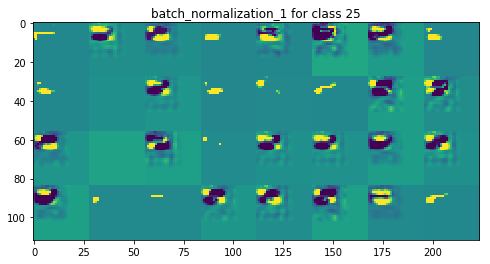

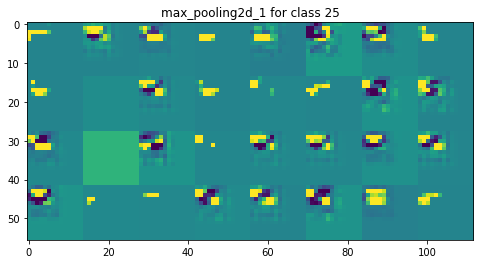

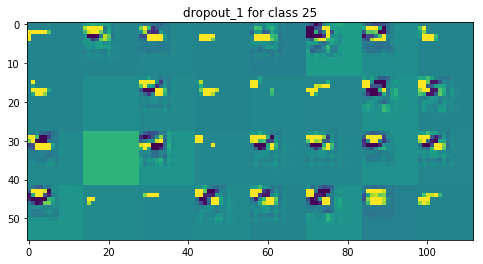

In [31]:
for i in range(6):
    layer_activations = activation_model.predict(x_test[i].reshape(1, 28, 28, 3))
    for j in range(6):
        layer_activation = layer_activations[j]
        images_per_row = 8    # number of images per row
        features = layer_activation.shape[-1]
        rows = features // images_per_row
        size = layer_activation.shape[1]
        display_features = np.zeros([rows*size, images_per_row*size], dtype='int')
        for row in range (rows):
            for col in range (images_per_row):
                img = layer_activation[0, :, :, row * images_per_row + col]
                img = post_process(img)
                display_features[ row*size : (row+1)*size, col * size : (col + 1) * size] = img
        scale = 1. / size
        plt.figure(figsize=(scale * display_features.shape[1],
                    scale * display_features.shape[0]))
        plt.title(layer_names[j] + ' for class ' + str(y_test[i]))
        plt.grid(False)
        plt.imshow(display_features,  aspect='auto', cmap='viridis')  